In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import gensim
from gensim.models import Word2Vec 
from gensim.models import KeyedVectors

from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation, TruncatedSVD
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC 
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, ExtraTreesClassifier 
from sklearn.metrics import accuracy_score

from utils import make_dataset, preprocess_txt, create_corpus, create_vocab, show_most_freq_n

%reload_ext autoreload
%autoreload 2

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# read all datasets
df_appceleratorstudio = pd.read_csv('./data/appceleratorstudio.csv')
df_aptanastudio = pd.read_csv('./data/aptanastudio.csv')
df_bamboo = pd.read_csv('./data/bamboo.csv')
df_clover = pd.read_csv('./data/clover.csv')
df_datamanagement = pd.read_csv('./data/datamanagement.csv')
df_duracloud = pd.read_csv('./data/duracloud.csv')
df_jirasoftware = pd.read_csv('./data/jirasoftware.csv')
df_mesos = pd.read_csv('./data/mesos.csv')
df_moodle = pd.read_csv('./data/moodle.csv')
df_mule = pd.read_csv('./data/mule.csv')
df_mulestudio = pd.read_csv('./data/mulestudio.csv')
df_springxd = pd.read_csv('./data/springxd.csv')
df_talenddataquality = pd.read_csv('./data/talenddataquality.csv')
df_talendesb = pd.read_csv('./data/talendesb.csv')
df_titanium = pd.read_csv('./data/titanium.csv')
df_usergrid = pd.read_csv('./data/usergrid.csv')

In [4]:
dataset_arr = [df_appceleratorstudio,
        df_aptanastudio,
        df_bamboo,
        df_clover,
        df_datamanagement,
        df_duracloud,
        df_jirasoftware,
        df_mesos,
        df_moodle,
        df_mule,
        df_mulestudio,
        df_springxd,
        df_talenddataquality,
        df_talendesb,
        df_titanium,
        df_usergrid]

In [5]:
#get union of datasets
text, labels = make_dataset(dataset_arr)

#create corpus
corpus, labels = create_corpus(text, labels)
len(corpus), len(labels)

(20760, 20760)

In [6]:
#create vocabulary
vocab = create_vocab(corpus)
len(vocab)

22550

In [7]:
# exp. check existance of these 2 words in our corpus
'jira' in vocab, 'Jira' in vocab

(True, False)

In [8]:
# load pre-trained w2v model
model = KeyedVectors.load_word2vec_format("./data/GoogleNews-vectors-negative300.bin",  binary = True)

In [9]:
# check word 'Jira' existance in pre-trained model, should find
model['Jira'].shape

(300,)

In [10]:
# check word 'jira' existance in pre-trained model,  shoule be KeyError
model['jira'].shape

KeyError: "word 'jira' not in vocabulary"

In [11]:
#words count in the pre-trained model
len(model.vocab.keys())

3000000

In [12]:
#exp check the difference of two sets
A=set((1,2,6))
B=set((1,2,3,4))
A-B

{6}

In [13]:
# the tokens count that are in our corpus but misses from the pre-traned model
new_elements = vocab - set(model.vocab.keys())
print("new words count in vocabulary", len(new_elements))
print("in common words count in vocabulary and pre-trained model", len(vocab) - len(new_elements))

new words count in vocabulary 12513
in common words count in vocabulary and pre-trained model 10037


In [14]:
# get most common words list from our vocabulary
corpus_as_words = [token for doc in corpus for token in doc]
most_common_items = nltk.FreqDist(corpus_as_words).most_common(30)
most_common_items[:5]

[('code', 9914),
 ('error', 8402),
 ('file', 6575),
 ('create', 6535),
 ('add', 5695)]

In [15]:
# get most common words key list from our vocabulary
most_common = [k for k,i in most_common_items]
print(most_common)

['code', 'error', 'file', 'create', 'add', 'test', 'project', 'new', 'studio', 'run', 'build', 'user', 'result', 'use', 'need', 'module', 'update', 'step', 'fail', 'version', 'app', 'message', 'set', 'work', 'info', 'support', 'change', 'android', 'log', 'issue']


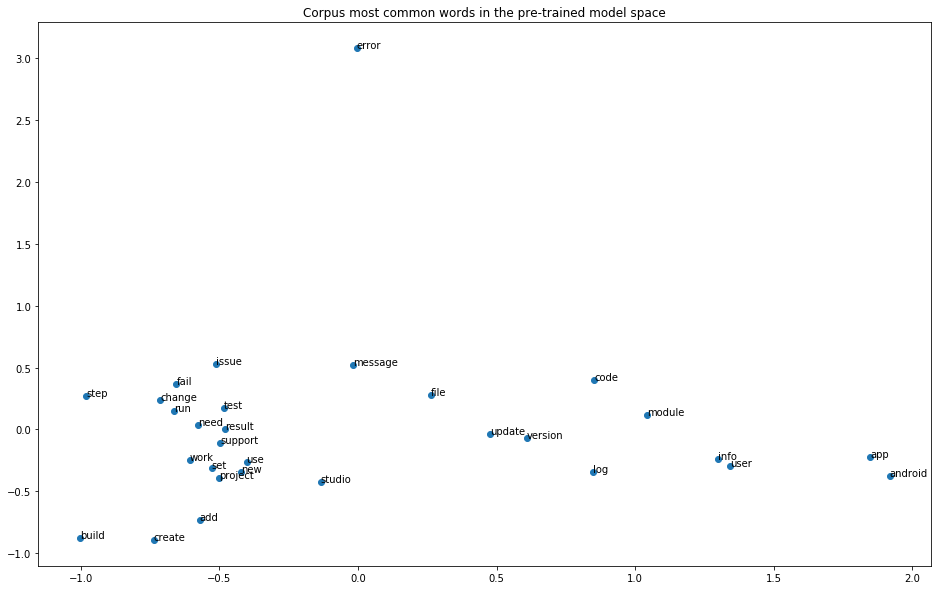

In [16]:
X = [model[key] for key in most_common]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection
plt.figure(figsize=(16,10))    
plt.title('Corpus most common words in the pre-trained model space')
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(most_common):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show();

In [17]:
#init word2vec, not pre-trained
model_2 = Word2Vec(size=300, min_count=1)
model_2.corpus_count, model_2.wv.vocab

(0, {})

In [18]:
#build new vocabulary
model_2.build_vocab(corpus)
#check vocab update
model_2.corpus_count, len(model_2.wv.vocab), model_2.wv.vocab

(20760,
 22550,
 {'asume': <gensim.models.keyedvectors.Vocab at 0x7f4e850f4e10>,
  'usepersistentconnection': <gensim.models.keyedvectors.Vocab at 0x7f4e82fc2828>,
  'bambooo': <gensim.models.keyedvectors.Vocab at 0x7f4ffc5ce358>,
  'abstractshellintegrationtest': <gensim.models.keyedvectors.Vocab at 0x7f4ffc5ce550>,
  'succesful': <gensim.models.keyedvectors.Vocab at 0x7f4e82c479b0>,
  'requested': <gensim.models.keyedvectors.Vocab at 0x7f4ffc5ce4e0>,
  'pop': <gensim.models.keyedvectors.Vocab at 0x7f4ffc5ce3c8>,
  'aaa': <gensim.models.keyedvectors.Vocab at 0x7f4ffc5ce588>,
  'frameset': <gensim.models.keyedvectors.Vocab at 0x7f4e82fc25c0>,
  'radians': <gensim.models.keyedvectors.Vocab at 0x7f4e82fc29b0>,
  'sw': <gensim.models.keyedvectors.Vocab at 0x7f4e82fc2a20>,
  'googlecontactentry': <gensim.models.keyedvectors.Vocab at 0x7f4e850f40b8>,
  'updated': <gensim.models.keyedvectors.Vocab at 0x7f4e83031ef0>,
  'versionname': <gensim.models.keyedvectors.Vocab at 0x7f4e83031f60>,
  'b

In [19]:
#check, should exist as 300 dim vector
model_2['jira'].shape

(300,)

In [20]:
#check, shouldn't exist, KeyError
model_2['Jira'].shape

KeyError: "word 'Jira' not in vocabulary"

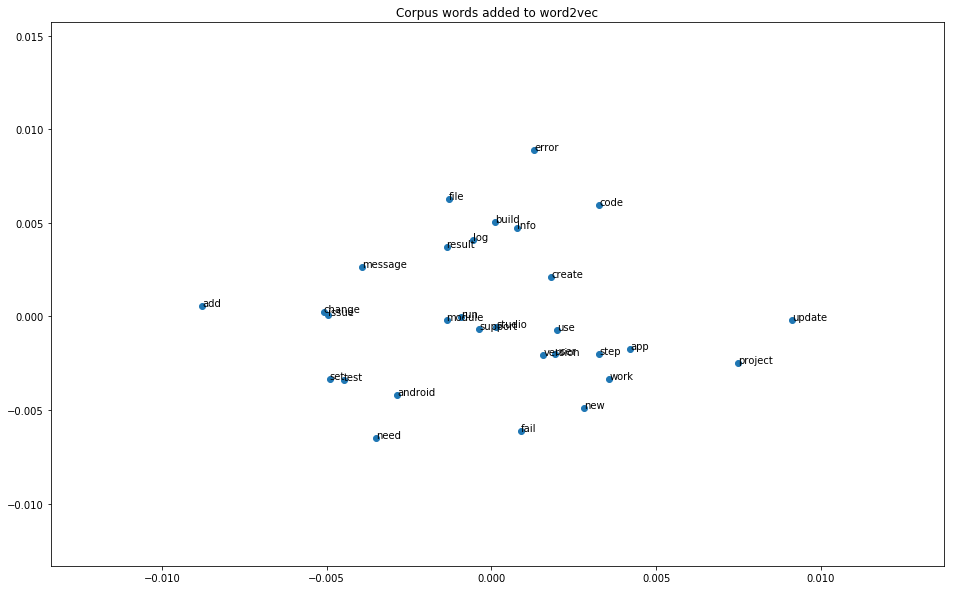

In [21]:
X_2 = [model_2[key] for key in most_common]

# fit a 2d PCA model to the vectors
pca_2 = PCA(n_components=2)
result_2 = pca_2.fit_transform(X_2)
# create a scatter plot of the projection
plt.figure(figsize=(16,10))    
plt.title('Corpus words added to word2vec')
plt.scatter(result_2[:, 0], result_2[:, 1], )
for i, word in enumerate(most_common):
    plt.annotate(word, xy=(result_2[i, 0], result_2[i, 1]))

plt.show();

In [22]:
model_2.intersect_word2vec_format("./data/GoogleNews-vectors-negative300.bin", binary=True, lockf=1.0)

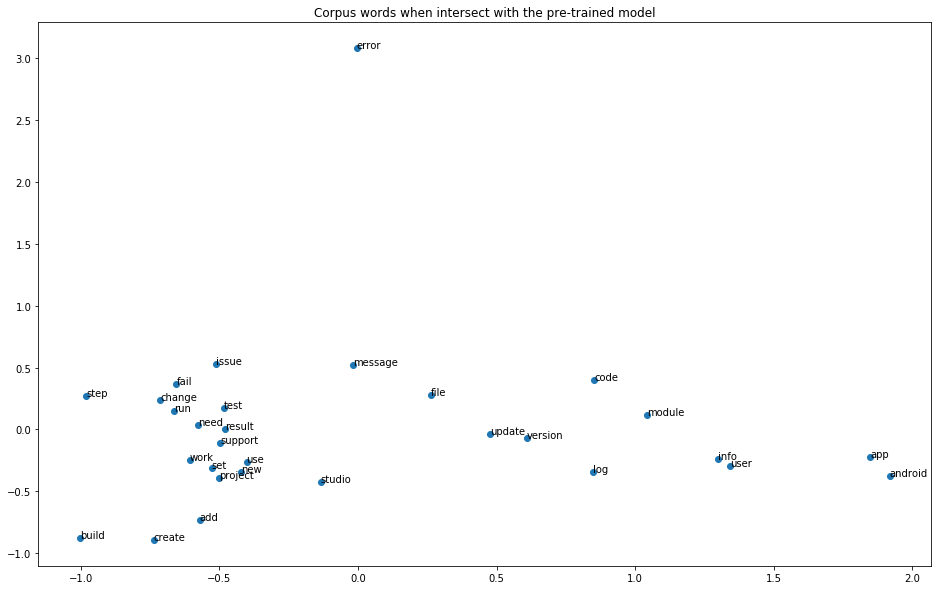

In [23]:
X_3 = [model_2[key] for key in most_common]

# fit a 2d PCA model to the vectors
pca_3 = PCA(n_components=2)
result_3 = pca_3.fit_transform(X_3)
# create a scatter plot of the projection
plt.figure(figsize=(16,10))    
plt.title('Corpus words when intersect with the pre-trained model')
plt.scatter(result_3[:, 0], result_3[:, 1])
for i, word in enumerate(most_common):
    plt.annotate(word, xy=(result_3[i, 0], result_3[i, 1]))

plt.show();

In [24]:
model_2.train(corpus, total_examples=model_2.corpus_count, epochs=1000)

(728423499, 786303000)

In [38]:
model_2.corpus_count, len(model_2.wv.vocab), model_2.wv.vocab

(20760,
 22550,
 {'trigger': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab6a0>,
  'exponent': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab588>,
  'beefy': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab400>,
  'lwp': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab550>,
  'amount': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab5c0>,
  'defaultmoduleoptionsresolver': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab668>,
  'advise': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab6d8>,
  'whiteliste': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab748>,
  'classification': <gensim.models.keyedvectors.Vocab at 0x7f054eb11f98>,
  'winmodule': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab7b8>,
  'chile': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab828>,
  'executionstate': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab860>,
  'standardised': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab898>,
  'ngmix': <gensim.models.keyedvectors.Vocab at 0x7f056f9ab8d0>,
  'postgresq

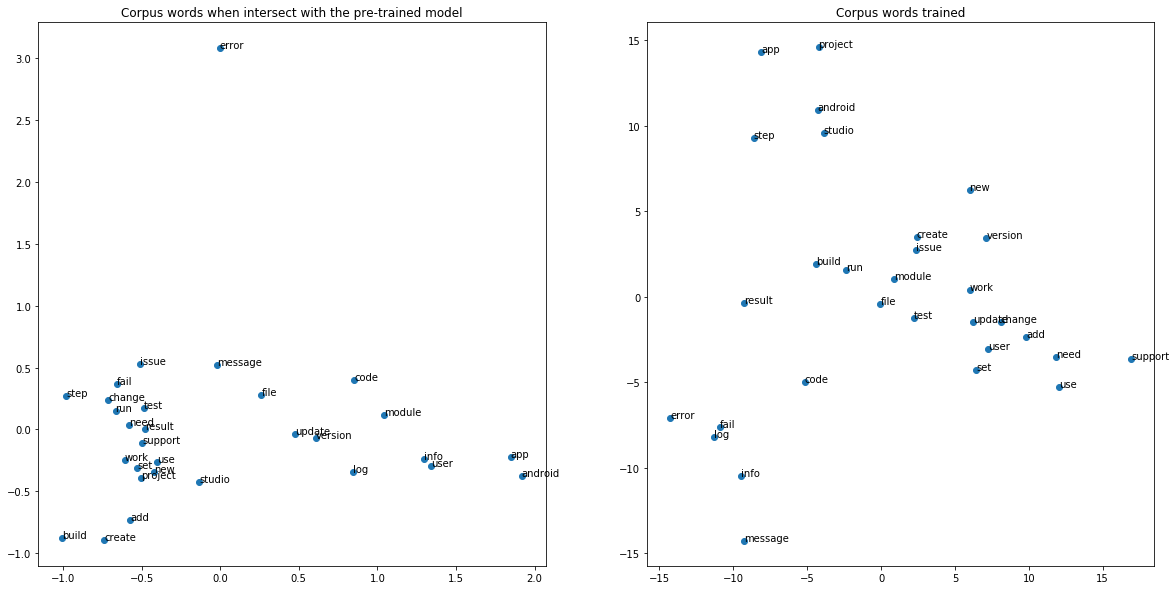

In [29]:
# # create a scatter plot of the projection
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

# # use reults after pre-training
# ax1.set_title('Corpus words when intersect with the pre-trained model')
# ax1.scatter(result_3[:, 0], result_3[:, 1])
# for i, word in enumerate(most_common):
#     ax1.annotate(word, xy=(result_3[i, 0], result_3[i, 1]))

X = [model[key] for key in most_common]

# fit a 2d PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)
# create a scatter plot of the projection   
ax1.set_title('Corpus words when intersect with the pre-trained model')
ax1.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(most_common):
    ax1.annotate(word, xy=(result[i, 0], result[i, 1]))


# fit a 2d PCA model to the vectors
X_4 = [model_2[key] for key in most_common]

pca_4 = PCA(n_components=2)
result_4 = pca_4.fit_transform(X_4)
# create a scatter plot of the projection  
ax2.set_title('Corpus words trained')
ax2.scatter(result_4[:, 0], result_4[:, 1])
for i, word in enumerate(most_common):
    ax2.annotate(word, xy=(result_4[i, 0], result_4[i, 1]))

# Evaluation

In [30]:
def analogy_w2v(x1, x2, y1):
    result = model.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [31]:
def analogy_w2v_trained(x1, x2, y1):
    result = model_2.most_similar(positive=[y1, x2], negative=[x1])
    return result[0][0]

In [36]:
analogy_w2v('user', 'support', 'developer'), analogy_w2v_trained('user', 'support', 'developer')

('backing', 'design')

In [49]:
model.most_similar("python")

[('pythons', 0.6688377857208252),
 ('Burmese_python', 0.6680365800857544),
 ('snake', 0.6606292724609375),
 ('crocodile', 0.6591362953186035),
 ('boa_constrictor', 0.6443520188331604),
 ('alligator', 0.6421656608581543),
 ('reptile', 0.6387744545936584),
 ('albino_python', 0.6158880591392517),
 ('croc', 0.6083584427833557),
 ('lizard', 0.6013416647911072)]

In [50]:
model_2.most_similar("python")

[('lsst', 0.30328434705734253),
 ('qserv', 0.2739877700805664),
 ('swig', 0.25659671425819397),
 ('mysqlclient', 0.2293100655078888),
 ('script', 0.22772660851478577),
 ('package', 0.22727708518505096),
 ('perl', 0.22089678049087524),
 ('colortermgroupconfig', 0.217355415225029),
 ('sqlalchemy', 0.21627342700958252),
 ('include', 0.2084345519542694)]

In [51]:
model.most_similar("bug")

[('bugs', 0.7603133916854858),
 ('worm', 0.6060654520988464),
 ('Bug', 0.5694829225540161),
 ('virus', 0.5549353361129761),
 ('Y2K_millennium', 0.5358161926269531),
 ('ActiveX_vulnerability', 0.5312477350234985),
 ('http://bugs.gentoo.org', 0.5258150100708008),
 ('vuln', 0.5222951173782349),
 ('insect', 0.5195446014404297),
 ('Bagle_virus', 0.5150192975997925)]

In [52]:
model_2.most_similar("bug")

[('issue', 0.3672688901424408),
 ('problem', 0.2741345763206482),
 ('ticket', 0.26849365234375),
 ('commit', 0.2427883744239807),
 ('verion', 0.22652696073055267),
 ('clang', 0.21768392622470856),
 ('fsevent', 0.21243023872375488),
 ('applicationresourceit', 0.20617535710334778),
 ('upgrade', 0.20586134493350983),
 ('crash', 0.20514699816703796)]

In [53]:
model.most_similar("log")

[('www.LPGA.com', 0.7195780277252197),
 ('www.ingfunds.com', 0.6799510717391968),
 ('http://www.dfwairport.com', 0.6678325533866882),
 ('www.eveningnews##.co.uk/forums', 0.6596200466156006),
 ('logs', 0.6452221274375916),
 ('www.supercross.cc.com', 0.6430407762527466),
 ('www.usrgrab.com', 0.6424795389175415),
 ('www.dfwairport.com', 0.6342345476150513),
 ('www.moparspeed.com_www.mopar.com', 0.6296842098236084),
 ('www.directwithhotels.com', 0.6250072121620178)]

In [54]:
model_2.most_similar("log")

[('message', 0.42580848932266235),
 ('logs', 0.4146004617214203),
 ('console', 0.4083865284919739),
 ('error', 0.404488205909729),
 ('occur', 0.3430597186088562),
 ('sessionname', 0.3111543655395508),
 ('debug', 0.3106651306152344),
 ('info', 0.3069968819618225),
 ('code', 0.30070146918296814),
 ('fail', 0.29763638973236084)]

## Corpus Features

In [55]:
len(model_2.wv.vocab)

22550

In [56]:
'jira' in model_2

True

In [57]:
'Jira' in model_2

False

In [58]:
len(model_2['jira'])

300

In [59]:
model_2.vector_size

300

In [60]:
def doc_feature_extraction(doc, w2v_model):
    feature_dim = w2v_model.vector_size
    doc_feautures = np.zeros(feature_dim, dtype='float64')
    for token in doc:
        doc_feautures += w2v_model[token]
    assert len(doc) != 0, doc
    doc_feautures = doc_feautures / len(doc)    
    assert len(doc_feautures) == feature_dim
    
    return  doc_feautures

In [61]:
def corpus_feature_extraction(corpus, w2v_model):
    corpus_features = [doc_feature_extraction(doc, w2v_model) for doc in corpus]
    
    return corpus_features

In [62]:
corpus_features = corpus_feature_extraction(corpus, model_2)

In [63]:
len(corpus_features), len(corpus_features[0])

(20760, 300)

## Classification and prediction

In [64]:
features_train, features_test, labels_train, labels_test = train_test_split(corpus_features, labels, test_size=0.3, random_state=111)

In [65]:
svc = LinearSVC(multi_class='crammer_singer')
knc = KNeighborsClassifier(n_neighbors=50)
mnb = MultinomialNB(alpha=0.2)
dtc = DecisionTreeClassifier(min_samples_split=7, random_state=111)
lrc = LogisticRegression(solver='lbfgs', penalty='l2', multi_class='multinomial', max_iter=10000)
rfc = RandomForestClassifier(n_estimators=31, random_state=111)
abc = AdaBoostClassifier(n_estimators=62, random_state=111)
bc = BaggingClassifier(n_estimators=9, random_state=111)
etc = ExtraTreesClassifier(n_estimators=9, random_state=111)

In [66]:
clfs = {'SVC' : svc,'KN' : knc, 'DT': dtc, 'LR': lrc, 'RF': rfc, 'AdaBoost': abc, 'BgC': bc, 'ETC': etc}

In [67]:
def train_clf(clf, train_x, train_y):
    clf.fit(train_x, train_y)

In [68]:
def predict_labels(clf, features):
    return (clf.predict(features))

In [69]:
pred_scores = []
for k,v in clfs.items():
    train_clf(v, features_train, labels_train)
    pred = predict_labels(v,features_test)
    pred_scores.append((k, [accuracy_score(labels_test,pred)]))

In [70]:
df = pd.DataFrame.from_items(pred_scores, orient='index', columns=['Score'])
df.sort_values(by=['Score'])

,Score
SVC,0.226557
DT,0.235710
AdaBoost,0.252730
BgC,0.263487
ETC,0.271516
LR,0.296724
KN,0.297688
RF,0.298812


In [71]:
# from previous method
tf_idf_scores_sorted = [('AdaBoost', [0.249318]),
 ('BgC', [0.310323]),
 ('DT', [0.273559]),
 ('ETC', [0.318510]),
 ('KN', [0.307272]),
 ('LR', [0.322203]),
 ('RF', [0.327821]),
 ('SVC', [0.307594])]

In [72]:
tf_idf_df = pd.DataFrame.from_items(tf_idf_scores_sorted, orient='index', columns=['TF-IDF'])
tf_idf_df

,TF-IDF
AdaBoost,0.249318
BgC,0.310323
DT,0.273559
ETC,0.318510
KN,0.307272
LR,0.322203
RF,0.327821
SVC,0.307594


In [73]:
w2v_scores_sorted = sorted(pred_scores, key=lambda x: x[0])
w2v_df = pd.DataFrame.from_items(w2v_scores_sorted, orient='index', columns=['Word2Vec'])
w2v_df

,Word2Vec
AdaBoost,0.252730
BgC,0.263487
DT,0.235710
ETC,0.271516
KN,0.297688
LR,0.296724
RF,0.298812
SVC,0.226557


In [74]:
df_compare = pd.DataFrame.join(tf_idf_df, w2v_df)
df_compare

,TF-IDF,Word2Vec
AdaBoost,0.249318,0.252730
BgC,0.310323,0.263487
DT,0.273559,0.235710
ETC,0.318510,0.271516
KN,0.307272,0.297688
LR,0.322203,0.296724
RF,0.327821,0.298812
SVC,0.307594,0.226557


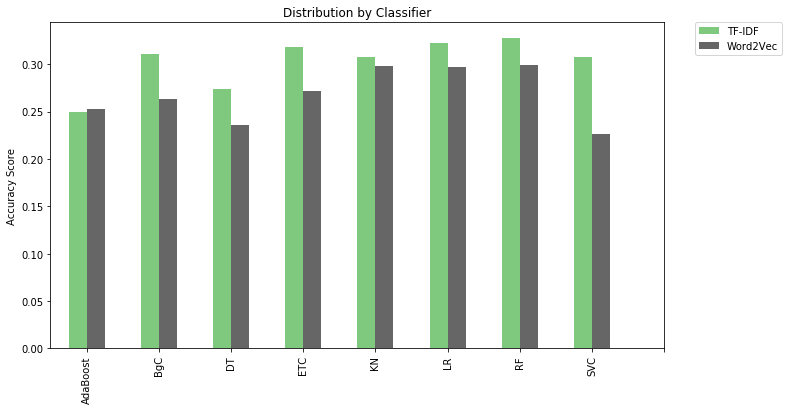

In [75]:
df_compare.plot(kind='bar', figsize=(11,6), align='center', colormap="Accent")
plt.xticks(np.arange(9), df_compare.index)
plt.ylabel('Accuracy Score')
plt.title('Distribution by Classifier')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.);